In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
geographyEncoder = LabelEncoder()
X['Geography'] = geographyEncoder.fit_transform(X['Geography'])
geography_classes = geographyEncoder.classes_
print(geography_classes)

['France' 'Germany' 'Spain']


In [6]:
gender_encoder = LabelEncoder()
X['Gender'] = gender_encoder.fit_transform(X['Gender'])
gender_classes = gender_encoder.classes_
print(gender_classes)


['Female' 'Male']


In [22]:
import seaborn as sns

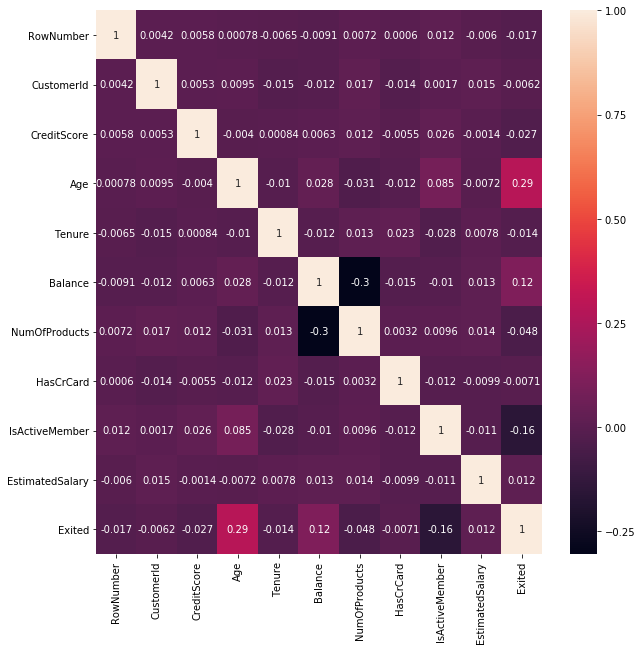

In [29]:
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.corr(), annot=True, linecolor='white')

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

Using TensorFlow backend.


In [9]:
classifier = Sequential()

In [10]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
# Adding the second hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

In [12]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [13]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
8000/8000 [==============================] - 1s 149us/step - loss: 0.5827 - acc: 0.7831
Epoch 2/100
8000/8000 [==============================] - 1s 109us/step - loss: 0.5351 - acc: 0.7934
Epoch 3/100
8000/8000 [==============================] - 1s 101us/step - loss: 0.5117 - acc: 0.7934
Epoch 4/100
8000/8000 [==============================] - 1s 96us/step - loss: 0.5058 - acc: 0.7934
Epoch 5/100
8000/8000 [==============================] - 1s 98us/step - loss: 0.5063 - acc: 0.7934
Epoch 6/100
8000/8000 [==============================] - 1s 97us/step - loss: 0.5063 - acc: 0.7926
Epoch 7/100
8000/8000 [==============================] - 1s 97us/step - loss: 0.5072 - acc: 0.7934
Epoch 8/100
8000/8000 [==============================] - 1s 98us/step - loss: 0.5095 - acc: 0.7934
Epoch 9/100
8000/8000 [==============================] - 1s 110us/step - loss: 0.5094 - acc: 0.7934
Epoch 10/100
8000/8000 [==============================] -

8000/8000 [==============================] - 1s 99us/step - loss: 0.5017 - acc: 0.7934
Epoch 80/100
8000/8000 [==============================] - 1s 93us/step - loss: 0.5016 - acc: 0.7934
Epoch 81/100
8000/8000 [==============================] - 1s 94us/step - loss: 0.5017 - acc: 0.7934
Epoch 82/100
8000/8000 [==============================] - 1s 93us/step - loss: 0.5017 - acc: 0.7934
Epoch 83/100
8000/8000 [==============================] - 1s 91us/step - loss: 0.5017 - acc: 0.7934
Epoch 84/100
8000/8000 [==============================] - 1s 95us/step - loss: 0.5016 - acc: 0.7934
Epoch 85/100
8000/8000 [==============================] - 1s 93us/step - loss: 0.5018 - acc: 0.7934
Epoch 86/100
8000/8000 [==============================] - 1s 93us/step - loss: 0.5016 - acc: 0.7934
Epoch 87/100
8000/8000 [==============================] - 1s 94us/step - loss: 0.5018 - acc: 0.7934
Epoch 88/100
8000/8000 [==============================] - 1s 93us/step - loss: 0.5017 - acc: 0.7934
Epoch 89/100


In [17]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [18]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [21]:
cm

array([[1616,    0],
       [ 384,    0]], dtype=int64)

In [19]:
# Checking accuracy
from sklearn.metrics import accuracy_score
clf_score = accuracy_score(y_test, y_pred)
print("Accuracy Score is:", clf_score)

Accuracy Score is: 0.808
